# Tests with Peak Finding

In [1]:
%matplotlib inline

In [2]:
#imports
from scipy import signal as scisig
from xastropy.xutils import peaks as xxpk
import peakutils
#
sys.path.append(os.path.abspath('/Users/xavier/local/Python/PYPIT/src/'))
import arcyarc
#
from astropy.stats import sigma_clip as sigclip

## Slit edge

In [3]:
# Using diff image (aka Sawtooth)
diff = fits.open('/Users/xavier/PYPIT/LRIS_blue/diff.fits')[0].data

In [4]:
mid_row = -1. * diff[200,:]

In [4]:
# Scipy -- the following fails
#peaks = scisig.find_peaks_cwt(diff, np.arange(1,10))

In [17]:
# peakdetect -- not so stable; not sure what delta really does
import pylab

y = mid_row
x = np.arange(y.shape[0])

_max, _min = xxpk.peakdetect(y, x, 30, delta=10)

xm = [p[0] for p in _max]
ym = [p[1] for p in _max]
xn = [p[0] for p in _min]
yn = [p[1] for p in _min]

plot = pylab.plot(x, y)
pylab.hold(True)
pylab.plot(xm, ym, 'r+')
pylab.plot(xn, yn, 'g+')

pylab.show()

In [9]:
# PeakUtils
indexes = peakutils.indexes(mid_row, thres=0.05, min_dist=30)
indexes

array([ 723,  770,  809,  862,  893,  940,  979, 1020])

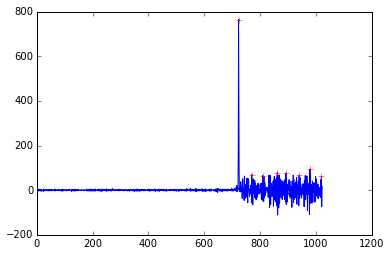

In [10]:
y = mid_row
x = np.arange(y.shape[0])

plt.clf()
plt.plot(x,y)
plt.plot(x[indexes], y[indexes], 'r+')
plt.show()

In [8]:
peaks_x = peakutils.interpolate(x, y, ind=indexes)
peaks_x

array([ 723.17878795])

In [5]:
# Ryan's code
clean = sigclip(mid_row)
rms = np.std(clean)
print('rms = {:g}'.format(rms))
#rms = 1.
siglev = 10.
tpixt, num = arcyarc.detections_sigma(mid_row,np.array([rms]*mid_row.shape[0]),np.zeros(mid_row.shape[0],dtype=np.int),siglev/2.0,siglev) 

rms = 6.59175


In [6]:
num, tpixt[0]

(1, 723)

In [7]:
tpixt

array([723,  -1,  -1, ...,  -1,  -1,   0])

In [8]:
pixt = arcyarc.remove_similar(tpixt, num)
pixt = pixt[np.where(pixt!=-1)].astype(np.int)
xrng = np.arange(mid_row.shape[0],dtype=np.float)
#tampl, tcent, twid, ngood = arcyarc.fit_arcorder(xrng,mid_row,pixt,5)
#w = np.where((np.isnan(twid)==False) & (twid > 0.0) & (twid < 10.0/2.35) & (tcent>0.0) & (tcent<xrng[-1]))

In [9]:
pixt

array([723])